In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("batdongsan_data.csv")

df = data.copy()

In [3]:
display(df.isna().sum())
display(df.head(10))

Tên BĐS        0
Vị trí         3
Giá            0
Diện tích      3
Giá/m²       171
Phòng ngủ    605
Phòng WC     742
dtype: int64

,Tên BĐS,Vị trí,Giá,Diện tích,Giá/m²,Phòng ngủ,Phòng WC
0,QUỸ CĂN NỘI BỘ THE NELSON TẦNG ĐẸP GIÁ NIÊM YẾ...,·,Giá thỏa thuận,106 m²,NaN,3.0,NaN
1,HOT! QUỸ CĂN NGOẠI GIAO ĐẸP NHẤT TẦNG 12 ĐẾN 2...,·,Giá thỏa thuận,"106,1 m²",NaN,3.0,NaN
2,HOT HÀNG HIẾM 10 SUẤT NGOẠI GIAO BẢNG HÀNG CỰC...,·,Giá thỏa thuận,83 m²,NaN,2.0,2.0
3,"TOÀ APARTMENT ĐỘI CẤN, 70M2*9T, MT 7M, 20 CĂN ...",·,"21,5 tỷ",70 m²,"307,14 tr/m²",20.0,20.0
4,"NHÀ RIÊNG ĐÀO TẤN 7 TẦNG THANG MÁY, CÁCH MẶT P...",·,"12,9 tỷ",42 m²,"307,14 tr/m²",10.0,NaN
5,"Bán nhà mặt phố Nguyễn Trường Tộ, 105m2, 4 tần...","Nguyễn Trung Trực, Ba Đình",77 tỷ,105 m²,"733,33 tr/m²",4.0,4.0
6,Bán nhà 55m2 xây 8 tầng giao 17 tỷ Phố Phan Kế...,"Cống Vị, Ba Đình",17 tỷ,55 m²,"309,09 tr/m²",4.0,7.0
7,"Bán nhà ngõ oto tránh phố Láng Hạ, Ba Đình. Th...","Giảng Võ, Ba Đình",48 tỷ,125 m²,384 tr/m²,4.0,4.0
8,Giá tốt (156tr/m2): Quỹ căn Vinhomes Metropoli...,"Ngọc Khánh, Ba Đình","26,5 tỷ",146 m²,"181,51 tr/m²",4.0,NaN
9,Bán nhà đẹp 2 MT tại Liễu Giai - Đội Cấn chính...,"Cống Vị, Ba Đình","95,75 tỷ",383 m²,250 tr/m²,NaN,NaN


In [4]:
def convert_price(value):
    if pd.isna(value) or value in ["N/A", "Giá thỏa thuận"]:
        return np.nan
    value = str(value).replace(",", ".").replace(" tỷ", "").strip()
    try:
        return float(value)
    except:
        return np.nan


def convert_area(value):
    if pd.isna(value) or value in ["N/A"]:
        return np.nan
    value = str(value).replace(",", ".").replace(" m²", "").strip()
    try:
        return float(value)
    except:
        return np.nan


def convert_price_per_m2(value):
    if pd.isna(value) or value in ["N/A"]:
        return np.nan
    value = str(value).replace(",", ".").replace(" tr/m²", "").replace("tr/m²", "").strip()
    try:
        return float(value)
    except:
        return np.nan


df["Giá"] = df["Giá"].apply(convert_price) * 1000
df["Diện tích"] = df["Diện tích"].apply(convert_area)
df["Giá/m²"] = df["Giá/m²"].apply(convert_price_per_m2) 
df["Vị trí"] = df["Vị trí"].replace({'.': np.nan, '·': np.nan})

df.head(10) 

,Tên BĐS,Vị trí,Giá,Diện tích,Giá/m²,Phòng ngủ,Phòng WC
0,QUỸ CĂN NỘI BỘ THE NELSON TẦNG ĐẸP GIÁ NIÊM YẾ...,NaN,NaN,106.0,NaN,3.0,NaN
1,HOT! QUỸ CĂN NGOẠI GIAO ĐẸP NHẤT TẦNG 12 ĐẾN 2...,NaN,NaN,106.1,NaN,3.0,NaN
2,HOT HÀNG HIẾM 10 SUẤT NGOẠI GIAO BẢNG HÀNG CỰC...,NaN,NaN,83.0,NaN,2.0,2.0
3,"TOÀ APARTMENT ĐỘI CẤN, 70M2*9T, MT 7M, 20 CĂN ...",NaN,21500.0,70.0,307.14,20.0,20.0
4,"NHÀ RIÊNG ĐÀO TẤN 7 TẦNG THANG MÁY, CÁCH MẶT P...",NaN,12900.0,42.0,307.14,10.0,NaN
5,"Bán nhà mặt phố Nguyễn Trường Tộ, 105m2, 4 tần...","Nguyễn Trung Trực, Ba Đình",77000.0,105.0,733.33,4.0,4.0
6,Bán nhà 55m2 xây 8 tầng giao 17 tỷ Phố Phan Kế...,"Cống Vị, Ba Đình",17000.0,55.0,309.09,4.0,7.0
7,"Bán nhà ngõ oto tránh phố Láng Hạ, Ba Đình. Th...","Giảng Võ, Ba Đình",48000.0,125.0,384.00,4.0,4.0
8,Giá tốt (156tr/m2): Quỹ căn Vinhomes Metropoli...,"Ngọc Khánh, Ba Đình",26500.0,146.0,181.51,4.0,NaN
9,Bán nhà đẹp 2 MT tại Liễu Giai - Đội Cấn chính...,"Cống Vị, Ba Đình",95750.0,383.0,250.00,NaN,NaN


In [5]:
display(df.isna().sum())
display(df.head(10))

Tên BĐS        0
Vị trí        50
Giá          173
Diện tích      5
Giá/m²       186
Phòng ngủ    605
Phòng WC     742
dtype: int64

,Tên BĐS,Vị trí,Giá,Diện tích,Giá/m²,Phòng ngủ,Phòng WC
0,QUỸ CĂN NỘI BỘ THE NELSON TẦNG ĐẸP GIÁ NIÊM YẾ...,NaN,NaN,106.0,NaN,3.0,NaN
1,HOT! QUỸ CĂN NGOẠI GIAO ĐẸP NHẤT TẦNG 12 ĐẾN 2...,NaN,NaN,106.1,NaN,3.0,NaN
2,HOT HÀNG HIẾM 10 SUẤT NGOẠI GIAO BẢNG HÀNG CỰC...,NaN,NaN,83.0,NaN,2.0,2.0
3,"TOÀ APARTMENT ĐỘI CẤN, 70M2*9T, MT 7M, 20 CĂN ...",NaN,21500.0,70.0,307.14,20.0,20.0
4,"NHÀ RIÊNG ĐÀO TẤN 7 TẦNG THANG MÁY, CÁCH MẶT P...",NaN,12900.0,42.0,307.14,10.0,NaN
5,"Bán nhà mặt phố Nguyễn Trường Tộ, 105m2, 4 tần...","Nguyễn Trung Trực, Ba Đình",77000.0,105.0,733.33,4.0,4.0
6,Bán nhà 55m2 xây 8 tầng giao 17 tỷ Phố Phan Kế...,"Cống Vị, Ba Đình",17000.0,55.0,309.09,4.0,7.0
7,"Bán nhà ngõ oto tránh phố Láng Hạ, Ba Đình. Th...","Giảng Võ, Ba Đình",48000.0,125.0,384.00,4.0,4.0
8,Giá tốt (156tr/m2): Quỹ căn Vinhomes Metropoli...,"Ngọc Khánh, Ba Đình",26500.0,146.0,181.51,4.0,NaN
9,Bán nhà đẹp 2 MT tại Liễu Giai - Đội Cấn chính...,"Cống Vị, Ba Đình",95750.0,383.0,250.00,NaN,NaN


In [6]:
df['Giá'].fillna(round(df['Giá'].mean()), inplace = True)
df['Diện tích'].fillna(round(df['Diện tích'].mean()), inplace = True)
df['Giá/m²'].fillna(round(df['Giá/m²'].mean()), inplace = True)
df['Phòng ngủ'].fillna(round(df['Phòng ngủ'].mean()), inplace = True)
df['Phòng WC'].fillna(round(df['Phòng WC'].mean()), inplace = True)
df['Vị trí'].fillna(df['Vị trí'].mode()[0], inplace = True)
df['Vị trí'] = df['Vị trí'].str.split(',').str[1]

C:\Users\84395\AppData\Local\Temp\ipykernel_21824\1175945430.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Giá'].fillna(round(df['Giá'].mean()), inplace = True)
C:\Users\84395\AppData\Local\Temp\ipykernel_21824\1175945430.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [7]:
display(df.isna().sum())
display(df.head(10))

df = df.drop_duplicates()
print("Số dòng sau khi loại trùng:", len(df))

Tên BĐS      0
Vị trí       0
Giá          0
Diện tích    0
Giá/m²       0
Phòng ngủ    0
Phòng WC     0
dtype: int64

,Tên BĐS,Vị trí,Giá,Diện tích,Giá/m²,Phòng ngủ,Phòng WC
0,QUỸ CĂN NỘI BỘ THE NELSON TẦNG ĐẸP GIÁ NIÊM YẾ...,Chương Mỹ,21599.0,106.0,221.00,3.0,5.0
1,HOT! QUỸ CĂN NGOẠI GIAO ĐẸP NHẤT TẦNG 12 ĐẾN 2...,Chương Mỹ,21599.0,106.1,221.00,3.0,5.0
2,HOT HÀNG HIẾM 10 SUẤT NGOẠI GIAO BẢNG HÀNG CỰC...,Chương Mỹ,21599.0,83.0,221.00,2.0,2.0
3,"TOÀ APARTMENT ĐỘI CẤN, 70M2*9T, MT 7M, 20 CĂN ...",Chương Mỹ,21500.0,70.0,307.14,20.0,20.0
4,"NHÀ RIÊNG ĐÀO TẤN 7 TẦNG THANG MÁY, CÁCH MẶT P...",Chương Mỹ,12900.0,42.0,307.14,10.0,5.0
5,"Bán nhà mặt phố Nguyễn Trường Tộ, 105m2, 4 tần...",Ba Đình,77000.0,105.0,733.33,4.0,4.0
6,Bán nhà 55m2 xây 8 tầng giao 17 tỷ Phố Phan Kế...,Ba Đình,17000.0,55.0,309.09,4.0,7.0
7,"Bán nhà ngõ oto tránh phố Láng Hạ, Ba Đình. Th...",Ba Đình,48000.0,125.0,384.00,4.0,4.0
8,Giá tốt (156tr/m2): Quỹ căn Vinhomes Metropoli...,Ba Đình,26500.0,146.0,181.51,4.0,5.0
9,Bán nhà đẹp 2 MT tại Liễu Giai - Đội Cấn chính...,Ba Đình,95750.0,383.0,250.00,5.0,5.0


Số dòng sau khi loại trùng: 2059


In [8]:
df["Giá_trên_m2_thực_tế"] = df["Giá"] / df["Diện tích"]

df = df[(df["Giá_trên_m2_thực_tế"] >= df["Giá_trên_m2_thực_tế"].quantile(0.02)) & (df["Giá_trên_m2_thực_tế"] <= df["Giá_trên_m2_thực_tế"].quantile(0.98))]
df = df[(df["Giá"] >= df["Giá"].quantile(0.02)) & (df["Giá"] <= df["Giá"].quantile(0.98))]
df = df[(df["Diện tích"] >= df["Diện tích"].quantile(0.02)) & (df["Diện tích"] <= df["Diện tích"].quantile(0.98))]

mean_price_by_location = df.groupby("Vị trí")["Giá_trên_m2_thực_tế"].mean()
df["Vị trí_embedding"] = df["Vị trí"].map(mean_price_by_location)

display(df.head(10))

,Tên BĐS,Vị trí,Giá,Diện tích,Giá/m²,Phòng ngủ,Phòng WC,Giá_trên_m2_thực_tế,Vị trí_embedding
0,QUỸ CĂN NỘI BỘ THE NELSON TẦNG ĐẸP GIÁ NIÊM YẾ...,Chương Mỹ,21599.0,106.0,221.00,3.0,5.0,203.764151,164.846657
1,HOT! QUỸ CĂN NGOẠI GIAO ĐẸP NHẤT TẦNG 12 ĐẾN 2...,Chương Mỹ,21599.0,106.1,221.00,3.0,5.0,203.572102,164.846657
2,HOT HÀNG HIẾM 10 SUẤT NGOẠI GIAO BẢNG HÀNG CỰC...,Chương Mỹ,21599.0,83.0,221.00,2.0,2.0,260.228916,164.846657
3,"TOÀ APARTMENT ĐỘI CẤN, 70M2*9T, MT 7M, 20 CĂN ...",Chương Mỹ,21500.0,70.0,307.14,20.0,20.0,307.142857,164.846657
4,"NHÀ RIÊNG ĐÀO TẤN 7 TẦNG THANG MÁY, CÁCH MẶT P...",Chương Mỹ,12900.0,42.0,307.14,10.0,5.0,307.142857,164.846657
5,"Bán nhà mặt phố Nguyễn Trường Tộ, 105m2, 4 tần...",Ba Đình,77000.0,105.0,733.33,4.0,4.0,733.333333,270.675898
6,Bán nhà 55m2 xây 8 tầng giao 17 tỷ Phố Phan Kế...,Ba Đình,17000.0,55.0,309.09,4.0,7.0,309.090909,270.675898
7,"Bán nhà ngõ oto tránh phố Láng Hạ, Ba Đình. Th...",Ba Đình,48000.0,125.0,384.00,4.0,4.0,384.000000,270.675898
8,Giá tốt (156tr/m2): Quỹ căn Vinhomes Metropoli...,Ba Đình,26500.0,146.0,181.51,4.0,5.0,181.506849,270.675898
10,"Bán nhà mặt phố Nguyên Hồng, quận Ba Đình, D...",Ba Đình,5200.0,50.0,104.00,5.0,5.0,104.000000,270.675898


Iteration 0: MSE = 0.49802591375130634
Iteration 1000: MSE = 0.24788295605946786
Iteration 2000: MSE = 0.2418663114375619
Iteration 3000: MSE = 0.24160975782231786
Iteration 4000: MSE = 0.24158749734410476
MSE Train: 0.24505154956528705
MSE Test: 0.22767892191374192
MSE_Test - MSE_Train: 0.017372627651545125
R²: 0.5824697784817914
Optimal weights: [1.42517503 0.24253338 0.26843044 0.48077209]
Optimal bias: -0.25617715109639455


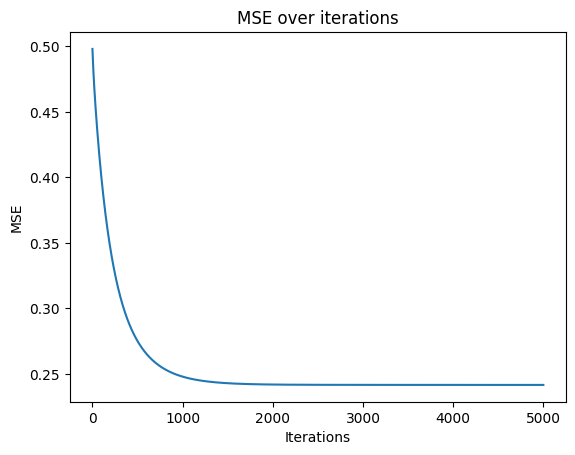

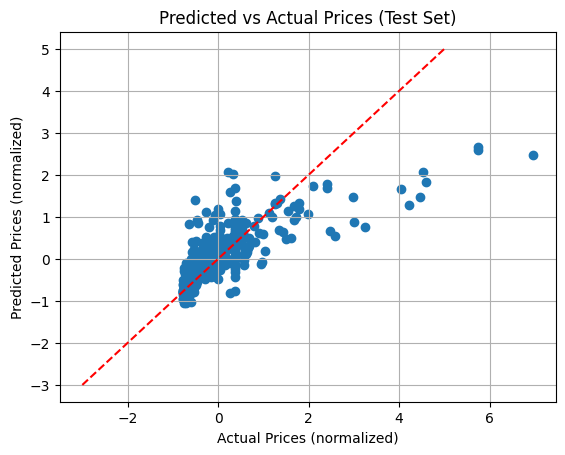

Predicted price for x_input [52.0, 6.0, 6.0, 546.560096]: 37230.62360832002


In [9]:
df = df[["Giá", "Diện tích", "Phòng ngủ", "Phòng WC", "Vị trí_embedding"]]

def hypothesis(X, w, b):
    return np.dot(X, w) + b  

def compute_mse(X, y, w, b):
    m = len(y)
    predictions = hypothesis(X, w, b)
    cost = np.sum((predictions - y) ** 2)
    mse = (1 / (2 * m)) * cost
    return mse

def gradient_descent(X, y, w, b, learning_rate, iterations):
    m = len(y)
    mse_history = []
    
    for i in range(iterations):
        predictions = hypothesis(X, w, b)
        error = predictions - y
        
        gradient_w = (1 / m) * np.dot(X.T, error)
        gradient_b = (1 / m) * np.sum(error)
        
        w -= learning_rate * gradient_w
        b -= learning_rate * gradient_b
        
        mse = compute_mse(X, y, w, b)
        mse_history.append(mse)
        
        if i % 1000 == 0:
            print(f"Iteration {i}: MSE = {mse}")
    
    return w, b, mse_history

X = df.drop(columns="Giá").values
y = df["Giá"].values

X_mean = np.mean(X)
X_std = np.std(X)
X = (X - X_mean) / X_std

y_mean = np.mean(y)
y_std = np.std(y)
y = (y - y_mean) / y_std

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

w_initial = np.zeros(X.shape[1])
b_initial = 0
learning_rate = 0.01
iterations = 5000

w_optimal, b_optimal, mse_history = gradient_descent(X, y, w_initial, b_initial, learning_rate, iterations)

mse_train = compute_mse(X_train, y_train, w_optimal, b_optimal)
mse_test = compute_mse(X_test, y_test, w_optimal, b_optimal)
print(f"MSE Train: {mse_train}")
print(f"MSE Test: {mse_test}")
print("MSE_Test - MSE_Train: {}".format(abs(mse_test - mse_train)))

y_test_pred = hypothesis(X_test, w_optimal, b_optimal)

ss_res = np.sum((y_test - y_test_pred) ** 2)
ss_tot = np.sum((y_test - np.mean(y_test)) ** 2)

r2 = 1 - (ss_res / ss_tot)

print("R²:", r2)

print(f"Optimal weights: {w_optimal}")
print(f"Optimal bias: {b_optimal}")

predictions = hypothesis(X, w_optimal, b_optimal)
predictions = predictions * y_std + y_mean  

plt.plot(range(iterations), mse_history)
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.title("MSE over iterations")
plt.show()

plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual Prices (normalized)")
plt.ylabel("Predicted Prices (normalized)")
plt.title("Predicted vs Actual Prices (Test Set)")
plt.plot([-3, 5], [-3, 5], 'r--')
plt.grid(True)
plt.show()

def f(a, b, c, d, bias):
    normalized_features = np.array([a, b, c, d])
    normalized_features = (normalized_features - X_mean) / X_std  
    result = np.dot(normalized_features, w_optimal) + b_optimal
    return result * y_std + y_mean 

x_input = [52.0, 6.0, 6.0, 546.560096]

y_pred = f(*x_input, b_optimal)
print(f"Predicted price for x_input {x_input}: {y_pred}")
